In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def get_simulation(ticker, name):
  data=pd.DataFrame()
  data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']
  
  log_returns = np.log(1 + data.pct_change())

  u = log_returns.mean()
  var = log_returns.var()

  drift = u - (0.5 * var) # variação da média móvel
  stdev = log_returns.std()

  t_intervals = 90 # quantos dias serão simulados
  iterations = 10 # quantidade de simulações

  daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

  S0 = data.iloc[-1]

  price_list = np.zeros_like(daily_returns) # lista com zeros do tamanho do numero de valores gerados
  price_list[0] = S0

  for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t] # baseia projeções em dias passados

  plt.figure(figsize=(10,6))
  plt.title("Simulação de Monte Carlo de 1 ano para " + name)
  plt.ylabel("Preço (P)")
  plt.xlabel("Tempo (Dias)")
  plt.plot(price_list)
  plt.show()

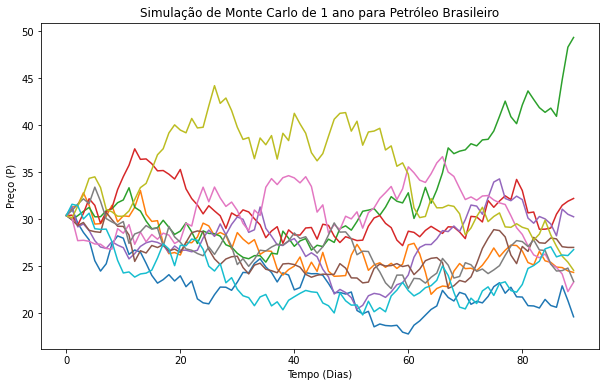

In [ ]:
get_simulation("PETR3.SA", "Petróleo Brasileiro") # código, nome da ação